# Data Analysis Project Work With Super Store Sales Data 

## Loading Data

In [2]:
df = pd.read_excel("data/SuperstoreSales.xlsx")
df.head(2)

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Customer State,Zip Code,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,3,2010-08-26,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
1,6,2012-01-03,Not Specified,2,6.93,0.01,Regular Air,-4.64,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04


In [3]:
# check column names, number of observations, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8399 non-null   int64         
 1   Order Date            8399 non-null   datetime64[ns]
 2   Order Priority        8399 non-null   object        
 3   Order Quantity        8399 non-null   int64         
 4   Sales                 8399 non-null   float64       
 5   Discount              8399 non-null   float64       
 6   Ship Mode             8399 non-null   object        
 7   Profit                8399 non-null   float64       
 8   Unit Price            8399 non-null   float64       
 9   Shipping Cost         8399 non-null   float64       
 10  Customer Name         8399 non-null   object        
 11  Customer State        8399 non-null   object        
 12  Zip Code              8399 non-null   int64         
 13  Region            

## Rename column names

- Remove extra spaces
- Lowercase names

In [4]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.lower()
df.head(2)

,orderid,orderdate,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
0,3,2010-08-26,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
1,6,2012-01-03,Not Specified,2,6.93,0.01,Regular Air,-4.64,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04


In [5]:
df.columns

Index(['orderid', 'orderdate', 'orderpriority', 'orderquantity', 'sales',
       'discount', 'shipmode', 'profit', 'unitprice', 'shippingcost',
       'customername', 'customerstate', 'zipcode', 'region', 'customersegment',
       'productcategory', 'productsub-category', 'productname',
       'productcontainer', 'productbasemargin', 'shipdate'],
      dtype='object')

In [6]:
# this also works
df = df.rename(columns={'Order ID' : 'orderid', 'Order Date' : 'orderdate', 'Order Priority' : 'orderpriority', 'Order Quantity' : 'orderquantity', 'Sales' : 'sales', 'Discount' : 'discount', 'Ship Mode' : 'shipmode', 'Profit' : 'profit', 'Unit Price' : 'unitprice', 'Shipping Cost' : 'shippingcost', 'Customer Name' : 'customername', 'Customer State' : 'customerstate', 'Zip Code' : 'zipcode', 'Region' : 'region', 'Customer Segment' : 'customersegment', 'Product Category' : 'productcategory', 'Product Sub-Category' : 'productsubcategory', 'Product Name' : 'productname', 'Product Container' : 'productcontainer', 'Product Base Margin' : 'productbasemargin', 'Ship Date' : 'shipdate'})
df.head(2)

,orderid,orderdate,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
0,3,2010-08-26,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
1,6,2012-01-03,Not Specified,2,6.93,0.01,Regular Air,-4.64,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04


## Inspecting data for missing values.

In [7]:
# check missing values
df.isnull().sum()

orderid                0
orderdate              0
orderpriority          0
orderquantity          0
sales                  0
discount               0
shipmode               0
profit                 0
unitprice              0
shippingcost           0
customername           0
customerstate          0
zipcode                0
region                 0
customersegment        0
productcategory        0
productsub-category    0
productname            0
productcontainer       0
productbasemargin      0
shipdate               0
dtype: int64

In [8]:
# summary statistics
df.describe()

,orderid,orderquantity,sales,discount,profit,unitprice,shippingcost,zipcode,productbasemargin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.179783,25.575426,1774.860490,0.049664,181.401194,89.310426,12.856427,48256.097631,0.512886
std,17260.883447,14.482837,3585.107345,0.031826,1224.670845,290.361311,17.318257,30689.098271,0.135991
min,3.000000,1.000000,2.240000,0.000000,-16253.680000,0.990000,0.490000,501.000000,0.350000
25%,15011.500000,13.000000,143.035000,0.020000,-82.764250,6.480000,3.300000,21794.000000,0.380000
50%,29857.000000,26.000000,449.420000,0.050000,-1.490000,20.990000,6.070000,43317.000000,0.520000
75%,44596.000000,38.000000,1706.285000,0.080000,166.712250,85.990000,13.990000,81221.000000,0.590000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,99403.000000,0.850000


## Indexing 

In [9]:
# index is like primary key in database (unique number assigned to each observation)
# check index column
df.index

RangeIndex(start=0, stop=8399, step=1)

In [10]:
# then set datetime [date] column as index (primary key). This is for time series analysis below.
df = df.set_index('orderdate')
df.head()

,orderid,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
orderdate,,,,,,,,,,,,,,,,,,,,
2010-08-26,3,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
2012-01-03,6,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04
2011-05-28,32,High,15,140.5600,0.04,Regular Air,-128.380,8.46,8.99,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Computer Peripherals,"Imation 3.5 IBM Diskettes, 10/Box",Small Pack,0.79,2011-05-29
2011-05-28,32,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,Liz Pelletier,Ohio,44197,Central,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-05-29
2011-05-28,32,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-05-30


## Some Summary Questions to find out

### What is the sales volume? 

In [11]:
df.sales.sum()

14907053.254

In [12]:
df.orderquantity.sum()

214808

### What is the total profit?

In [13]:
df.profit.sum()

1523588.6295

## Time series (seasonality)

### Do you observe any seasonality in the sales volume? 

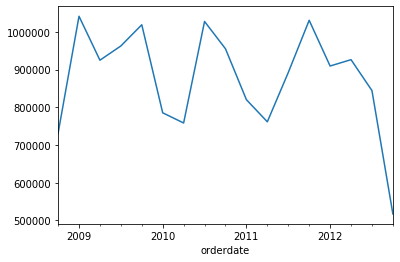

In [14]:
df.sales.resample('Q').sum().plot()

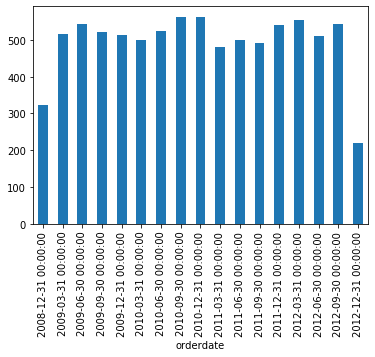

In [15]:
df.sales.resample('Q').size().plot(kind='bar')

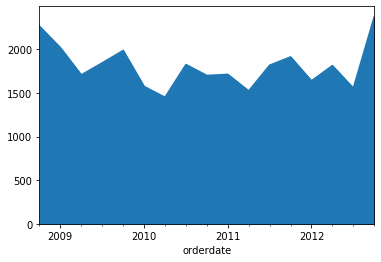

In [16]:
df.sales.resample('Q').mean().plot(kind='area')

### Do you observe any seasonality in the shipping cost? 

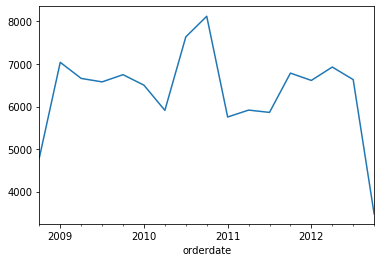

In [17]:
df.shippingcost.resample('Q').sum().plot()

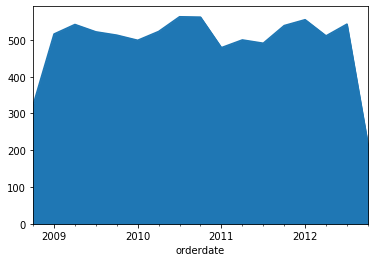

In [18]:
df.shippingcost.resample('Q').size().plot(kind='area')

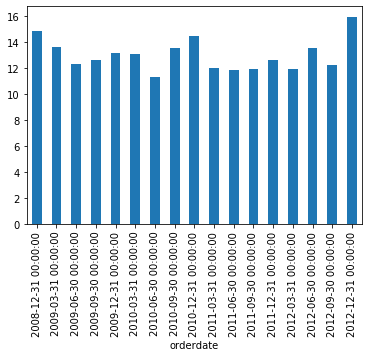

In [19]:
df.shippingcost.resample('Q').mean().plot(kind='bar')

## Detailed Questions

### What is the sales volume in each product category? Which product category is doing well?

In [60]:
df.groupby('productcategory')['sales'].sum()

productcategory
Furniture          5119254.482
Office Supplies    3800227.370
Technology         5987571.402
Name: sales, dtype: float64

In [21]:
df.groupby('productcategory')['sales'].sum().sort_values(ascending=False).head(1)

productcategory
Technology    5987571.402
Name: sales, dtype: float64

### What are top two categories in terms of profit? 

In [22]:
df.groupby('productcategory')['profit'].sum().sort_values(ascending=False).head(2)

productcategory
Technology         855437.2250
Office Supplies    515776.6045
Name: profit, dtype: float64

### Which region is profitable compared to other regions? Any region experiencing financial losses? (Include productcategory in this analysis) 

In [23]:
df.groupby(['region', 'productcategory'])['profit'].sum().sort_values(ascending=False).head(1)

region  productcategory
South   Technology         302117.59
Name: profit, dtype: float64

In [24]:
df.groupby(['region', 'productcategory'])['profit'].sum().sort_values(ascending=False).tail(1)

region  productcategory
East    Furniture         -12721.46
Name: profit, dtype: float64

### Which state in the East is least profitable? Include Product Category in your analysis. 

In [25]:
df.groupby(['customerstate', 'region', 'productcategory'])['profit'].sum().sort_values(ascending=False).tail(1)

customerstate  region  productcategory
New Jersey     East    Furniture         -18171.95
Name: profit, dtype: float64

In [26]:
df.columns

Index(['orderid', 'orderpriority', 'orderquantity', 'sales', 'discount',
       'shipmode', 'profit', 'unitprice', 'shippingcost', 'customername',
       'customerstate', 'zipcode', 'region', 'customersegment',
       'productcategory', 'productsub-category', 'productname',
       'productcontainer', 'productbasemargin', 'shipdate'],
      dtype='object')

### For the State of Nebraska, which year is least profitable? which product is least profitable?

Now, let's focus on Nebraska.

In [27]:
df.groupby([df.index.strftime('%Y'), 'customerstate', 'productname'])['profit'].sum().sort_values(ascending = False).tail(20)

orderdate  customerstate   productname                                                                     
2009       Utah            Lexmark 4227 Plus Dot Matrix Printer                                                -5350.27
           Nebraska        Lexmark 4227 Plus Dot Matrix Printer                                                -5509.20
2012       Nebraska        Lexmark 4227 Plus Dot Matrix Printer                                                -5577.62
2011       Maryland        Polycom ViewStation™ Adapter H323 Videoconferencing Unit                            -5584.68
2009       Washington      Epson DFX-8500 Dot Matrix Printer                                                   -5737.27
2011       New Jersey      SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black    -7194.06
2009       California      Okidata Pacemark 4410N Wide Format Dot Matrix Printer                               -7958.16
           Michigan        Epson DFX-8500 Dot Matrix

#### 2012 with product Lexmark 4227 Plus Dot Matrix Printer  and a profit of -5577.62

### Drill down. Which part of Nebraska is profitable? 

In [28]:
df.groupby(['customerstate', 'region'])['profit'].sum().sort_values(ascending=False).head(20)

customerstate   region 
Maryland        South      114643.8955
New York        East       112099.2555
North Carolina  South       86088.3195
Idaho           West        79430.2490
Colorado        West        73575.0925
South Carolina  South       70693.3375
Mass            East        69617.1840
Utah            West        66946.4110
Ohio            Central     66357.5195
California      West        65174.2255
Alabama         South       64827.2220
Florida         South       61424.5245
Arizona         West        60461.3940
Nebraska        Central     58266.1460
Georgia         South       54692.7940
Illinois        Central     54506.6820
Virginia        South       53308.6585
Texas           Central     52496.2385
Connecticut     East        43751.6405
Washington      West        41894.4475
Name: profit, dtype: float64

#### Nebraska central was more profitable.

### What kinds of furniture are not profitable?

In [29]:
df.groupby(['productsub-category', 'productcategory'])['profit'].sum().sort_values(ascending=False).tail(1)

productsub-category  productcategory
Tables               Furniture         -61271.15
Name: profit, dtype: float64

#### The furniture kind is table

### What kinds of office supplies are most profitable? What kinds of office supplies need to be improved in terms of sales and profits?

In [30]:
df.groupby(['productsub-category', 'productcategory'])['profit'].sum().sort_values(ascending=False).head(10)

productsub-category             productcategory
Telephones and Communication    Technology         316951.6410
Binders and Binder Accessories  Office Supplies    307174.1845
Office Machines                 Technology         276590.3400
Copiers and Fax                 Technology         167361.4640
Chairs & Chairmats              Furniture          149938.2300
Appliances                      Office Supplies     98023.0800
Office Furnishings              Furniture           96878.4000
Computer Peripherals            Technology          94533.7800
Envelopes                       Office Supplies     48711.0800
Paper                           Office Supplies     45987.2000
Name: profit, dtype: float64

In [31]:
df.groupby(['productsub-category', 'productcategory'])['profit', 'sales'].sum().sort_values(by=['profit', 'sales'], ascending=False)

C:\Users\Nana Tieku\Saved Games\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,profit,sales
productsub-category,productcategory,,
Telephones and Communication,Technology,316951.6410,1889313.802
Binders and Binder Accessories,Office Supplies,307174.1845,1024521.850
Office Machines,Technology,276590.3400,2171342.760
Copiers and Fax,Technology,167361.4640,1130361.300
Chairs & Chairmats,Furniture,149938.2300,1744144.730
Appliances,Office Supplies,98023.0800,747333.010
Office Furnishings,Furniture,96878.4000,665912.350
Computer Peripherals,Technology,94533.7800,796553.540
Envelopes,Office Supplies,48711.0800,176298.060


#### Scissors, Rulers and Trimmers	Office Supplies	-7799.2500	80996.310

### What kinds of technology are profitable?

In [32]:
df.groupby(['productsub-category', 'productcategory'])['profit'].sum().sort_values(ascending=False).head()

productsub-category             productcategory
Telephones and Communication    Technology         316951.6410
Binders and Binder Accessories  Office Supplies    307174.1845
Office Machines                 Technology         276590.3400
Copiers and Fax                 Technology         167361.4640
Chairs & Chairmats              Furniture          149938.2300
Name: profit, dtype: float64

#### Telephones and Communication    Technology         316951.6410

### Is there any relationship (or correlation) between “profits” and “sales”? Show a trend line

In [33]:
df.corr()

,orderid,orderquantity,sales,discount,profit,unitprice,shippingcost,zipcode,productbasemargin
orderid,1.000000,0.011461,-0.006822,-0.003568,-0.005849,-0.003867,-0.003857,-0.011369,-0.024529
orderquantity,0.011461,1.000000,0.220413,-0.010160,0.196062,-0.104341,-0.012162,0.017114,0.006781
sales,-0.006822,0.220413,1.000000,-0.018951,0.577657,0.602518,0.434261,-0.011301,0.157456
discount,-0.003568,-0.010160,-0.018951,1.000000,-0.038563,0.001760,-0.000269,0.002057,0.005559
profit,-0.005849,0.196062,0.577657,-0.038563,1.000000,-0.035542,-0.018124,-0.004923,-0.106292
unitprice,-0.003867,-0.104341,0.602518,0.001760,-0.035542,1.000000,0.239953,-0.007564,0.058523
shippingcost,-0.003857,-0.012162,0.434261,-0.000269,-0.018124,0.239953,1.000000,-0.018904,0.374660
zipcode,-0.011369,0.017114,-0.011301,0.002057,-0.004923,-0.007564,-0.018904,1.000000,0.006904
productbasemargin,-0.024529,0.006781,0.157456,0.005559,-0.106292,0.058523,0.374660,0.006904,1.000000


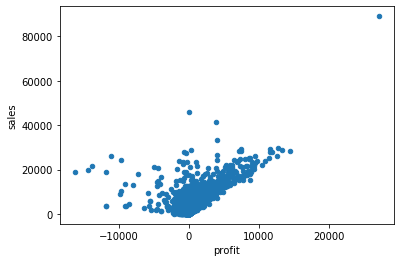

In [34]:
df.plot.scatter(x='profit', y='sales')

C:\Users\Nana Tieku\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


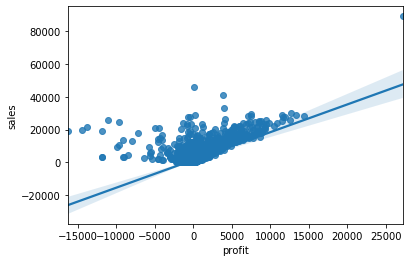

In [35]:
sns.regplot('profit', 'sales', df)

#### Positive correlation and a positive regresion line. That is as sales increases, profit increases too.

### Overall, which year is least profitable? 

- we ignore year 2008 since it has only two months in the data

In [36]:
df.groupby(df.index.strftime('%Y'))['profit'].sum().sort_values(ascending = False)

orderdate
2011    419755.3845
2009    406718.5260
2010    337239.4165
2012    291141.9190
2008     68733.3835
Name: profit, dtype: float64

#### 2012  with  291141.9190 profit

# Drilling Down: What happend in 2009 & January 2009?

## Let's focus on Year 2009 and answer some questions below 

### Which region performed so poorly?

In [37]:
d2009 = df['2009']
d2009.head(2)

,orderid,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
orderdate,,,,,,,,,,,,,,,,,,,,
2009-04-16,69,Not Specified,42,1186.06,0.09,Regular Air,511.69,30.93,3.92,Jonathan Doherty,Ohio,43567,Central,Corporate,Furniture,Office Furnishings,Advantus Employee of the Month Certificate Fra...,Small Pack,0.44,2009-04-18
2009-04-16,69,Not Specified,28,51.53,0.03,Express Air,0.35,1.68,0.70,Jonathan Doherty,Ohio,43567,Central,Corporate,Office Supplies,Pens & Art Supplies,Newell 308,Wrap Bag,0.60,2009-04-18


In [38]:
d2009.groupby('region')['profit'].sum().sort_values(ascending = False).tail(1)

region
East    46657.2375
Name: profit, dtype: float64

### Which zipcode areas performed so poorly?

In [39]:
d2009.groupby('zipcode')['profit'].sum().sort_values(ascending = False).tail(1)

zipcode
10501   -16557.085
Name: profit, dtype: float64

### Which product category performed so poorly?

In [40]:
d2009.groupby('productcategory')['profit'].sum().sort_values(ascending = False).tail(1)

productcategory
Furniture    71904.9
Name: profit, dtype: float64

In [41]:
d2009.groupby('productcategory')['profit', 'sales'].sum().sort_values(by=['profit', 'sales'], ascending = False).tail(1)

C:\Users\Nana Tieku\Saved Games\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,profit,sales
productcategory,,
Furniture,71904.9,1341005.366


### Which productsub-category performed so poorly?

In [42]:
d2009.groupby('productsub-category')['profit'].sum().sort_values(ascending = False).tail(1)

productsub-category
Tables   -10621.34
Name: profit, dtype: float64

### Which product performed so poorly?

In [43]:
d2009.groupby('productname')['profit'].sum().sort_values(ascending = False).tail(1)

productname
Okidata Pacemark 4410N Wide Format Dot Matrix Printer   -26610.81
Name: profit, dtype: float64

## Let's focus on January 2009 and answer some questions below

### Which region performed so poorly?

In [44]:
jan = df['01/01/2009' : '01/31/2009']
jan.head(2)

,orderid,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
orderdate,,,,,,,,,,,,,,,,,,,,
2009-01-09,1059,Critical,24,990.10,0.03,Regular Air,310.2160,40.98,7.47,Sean O'Donnell,Maryland,21794,South,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box,0.37,2009-01-10
2009-01-09,1059,Critical,22,127.33,0.02,Regular Air,5.2955,5.34,2.99,Sean O'Donnell,Maryland,21794,South,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box,0.38,2009-01-11


In [45]:
jan.groupby('region')['profit'].sum().sort_values(ascending = False).tail(1)

region
East   -12084.332
Name: profit, dtype: float64

### Which zipcode areas performed so poorly?

In [46]:
jan.groupby('zipcode')['profit'].sum().sort_values(ascending = False).tail(1)

zipcode
10501   -16253.68
Name: profit, dtype: float64

### Which product category performed so poorly?

In [47]:
jan.groupby('productcategory')['profit'].sum().sort_values(ascending = False).tail(1)

productcategory
Technology   -10547.701
Name: profit, dtype: float64

### Which productsub-category performed so poorly?

In [48]:
jan.groupby('productsub-category')['profit'].sum().sort_values(ascending = False).tail(1)

productsub-category
Copiers and Fax   -8496.27
Name: profit, dtype: float64

### Which product performed so poorly?

In [49]:
jan.groupby('productname')['profit'].sum().sort_values(ascending = False).tail(1)

productname
Polycom ViewStation™ ISDN Videoconferencing Unit   -16253.68
Name: profit, dtype: float64

### Which state made had more sales?

In [51]:
df.groupby(['customerstate', 'region'])['sales'].sum().sort_values(ascending=False).head(1)

customerstate  region
Mass           East      835734.6605
Name: sales, dtype: float64

### Which state and region ordered the highest quantity of products

In [53]:
df.groupby(['customerstate', 'region'])['orderquantity'].sum().sort_values(ascending=False).head(1)

customerstate  region 
Texas          Central    11178
Name: orderquantity, dtype: int64

### who paid the highest amount for a product and what product and quantity.

In [55]:
df.groupby(['customername', 'productname'])['sales', 'orderquantity'].sum().sort_values(by=['sales', 'orderquantity'], ascending=False).head(1)

C:\Users\Nana Tieku\Saved Games\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,,sales,orderquantity
customername,productname,,
Emily Phan,Polycom ViewStation™ ISDN Videoconferencing Unit,89061.05,13


### What is the total shipping cost and which shihpping mode cost the highest?

In [57]:
df.shippingcost.sum()

107981.13

In [58]:
df.groupby('shipmode')['shippingcost'].sum().sort_values(ascending=False).head(1)

shipmode
Delivery Truck    52121.79
Name: shippingcost, dtype: float64

# Findings

## Within 2008 and 2012, the activitis of Superstore across the United States came in the limelight to assess the performance base on a number of variables. These variable includes, sales, profit, quantity ordered, the type of product, the product category, the product sub-category, the individual States, Regions, shipping cost, shipping mode etc. Our analysis gave us the following insight.
### 1. Our total sales and profit came up to be 14,907,053.254 and 1,523,588.6295 respectively.
### 2. There exist a seasonal trend which begins December 2008 to December 2012 with highest quarter for sales is March 2009, the mean sales records December 2012 as seen on our data visialization. The seasonal trend for profit showed the highest quarter for profit to be December 2010 with mean for each quarter seen through the visualisation.
### 3. Looking at the sales volume in each product category, we found out that Tchnology is the product category doing well. A critical look at the top two product category in terms of profit were Tchnology and office supplies.
### 4. Our findings delved into the knowing the region with the product cayegory that performed well and poorly. our results showed South with Technology as the prodyct category made the most profit and East with Furniture giving the least profit. The State in the East with the least profit in terms of product category was New Jersey with Furniture as the product category.
### 5. In the year 2012, the State of Nebraska had the least profit with  Lexmark 4227 Plus Dot Matrix Printer as the product. Overall, Nebraska Central is the most profitable.
### 6. In our day to day life, most of us know that to ascertain profit, we must make more sales to exceed out cost incurred. Therefore, the more you make sales, the more you make profit. Our findings showed a positive correlation between sales and profit. The best fit line that is the regression line also showed a positive slope. Thus, as sales increases, profit increases.
### 7. In the year 2009, our analysis gave us some variables performing poorly in relation to profit. The East region, zip code 10501, furniture as product category, table as product sub-category and Okidata Pacemark 4410N Wide Format Dot Matrix Printer as a product performed poorly.
### 8. During the month January 2009, East as a region, 10501 as the zip code, Technology as the product category, copiers and fax as the product sub-category and Polycom ViewStation™ ISDN Videoconferencing Unit as the product performed poorly in relation to profit.
### 9. Other findings were the State with the highest sales which was Mass, Emily Phan being the person who purchased more items and Texas being the State with the hight purchase in quantity of products from Superstore.
### In conclusion, our analysis provided as with an insight to know which product sells over the years, the State that performed well and poorly in terms of sales and profit, the region that performed well and poorly in relation to sales and profit and so forth.




